In [1]:
import supervisely_lib as sly
import matplotlib.pyplot as plt
import cv2
from termcolor import colored

%matplotlib inline

In [2]:
task_paths = sly.TaskPaths()
project_dir = task_paths.project_dir
project_meta = sly.ProjectMeta.from_dir(project_dir)

In [22]:
color_mapping = {}
for cls_descr in project_meta.classes:
    color_s = cls_descr.get('color')
    if color_s is not None:
        color = sly.hex2rgb(color_s)  # use color from project meta if exists
    else:
        color = sly.get_random_color()  # or use random color otherwise
    color_mapping[cls_descr['title']] = color

In [3]:
fs = sly.ProjectFS.from_disk(*sly.ProjectFS.split_dir_project(project_dir))

In [27]:
print('Input project: "{}" contains {} dataset(s) and {} image(s).'.format(
        fs.pr_structure.name,
        len(fs.pr_structure.datasets),
        fs.image_cnt))
print('Images contains classes with colors: ')
for cls in color_mapping.items():
   print('Class: {}, color: {}'.format(cls[0], cls[1]))

Input project: "project" contains 1 dataset(s) and 2 image(s).
Images contains classes with colors: 
Class: Bike, color: [255, 170, 0]
Class: Bitmap, color: [255, 0, 0]
Class: Car, color: [0, 255, 0]
Class: Pedestrian, color: [170, 170, 255]
Class: Sign, color: [0, 255, 255]
Class: TrafficLight, color: [255, 255, 170]


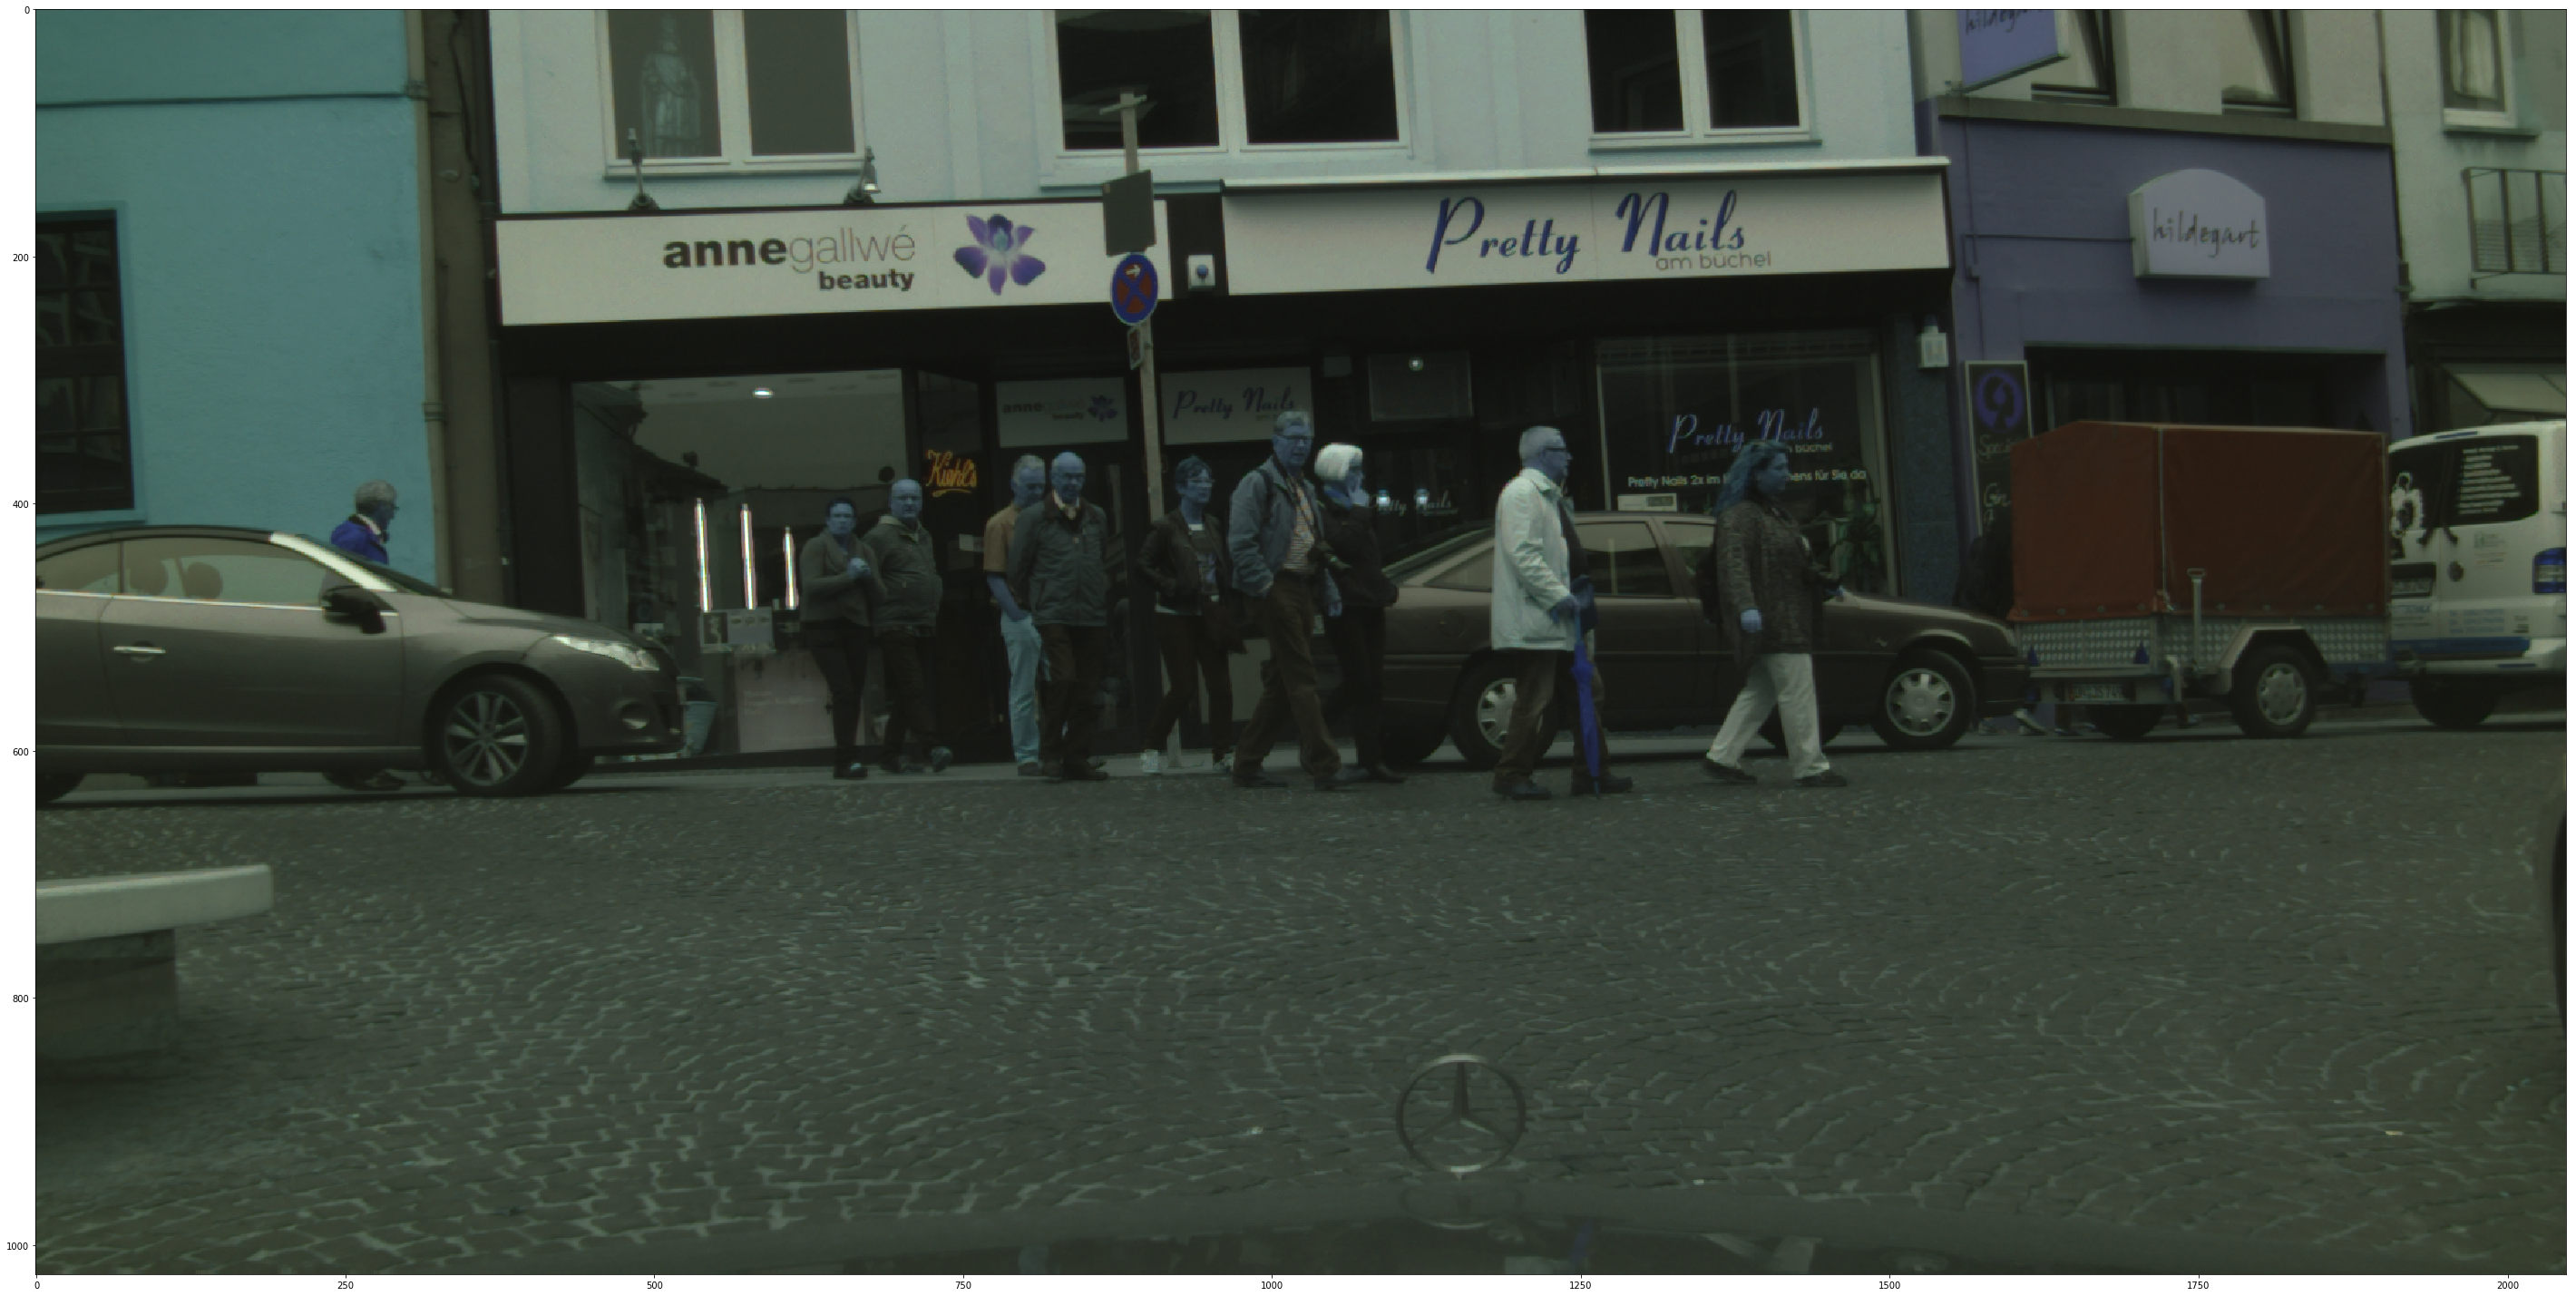

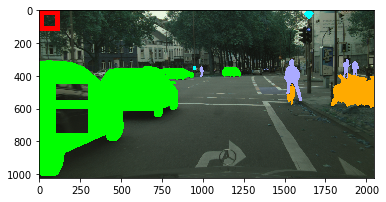

In [29]:
plt.figure(figsize=(50, 50))
for item_descr in fs:
    ann_packed = sly.json_load(item_descr.ann_path)
    ann = sly.Annotation.from_packed(ann_packed, project_meta)
    img = cv2.imread(item_descr.img_path)
    for obj in ann._data['objects']:
        obj.draw(img, color_mapping[obj.data['classTitle']])
    plt.imshow(img)
    plt.show()